# Importing the libraries

In [5]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.models import Sequential
from keras.preprocessing import image_dataset_from_directory
from keras.applications import InceptionResNetV2
from keras.layers.experimental.preprocessing import Resizing, Rescaling
from keras.losses import SparseCategoricalCrossentropy

# Uploading the dataset

In [6]:
data_dir = "D:\\Work\\My work\\IT sem 1\\sem 3\\rice leaf detection\\archive (1)\\rice_leaf_diseases"

In [7]:
dataset = image_dataset_from_directory(data_dir, labels="inferred", seed = 42, 
                                           validation_split = 0.2, subset= 'both')

Found 120 files belonging to 3 classes.
Using 96 files for training.
Using 24 files for validation.


# Splitting the dataset

In [8]:
train = dataset[0]
test = dataset[1]

# Building and training the model

In [9]:
new_input = Input(shape=(299, 299, 3))

In [10]:
ptm = InceptionResNetV2(input_tensor=new_input, weights='imagenet', include_top=False)
ptm.trainable = False

In [11]:
ptm.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_norm

In [18]:
resize_and_rescale = Sequential()
resize_and_rescale.add(Resizing(299,299))
resize_and_rescale.add(Rescaling(1.0/255))

In [19]:
model = Sequential()
model.add(resize_and_rescale)
model.add(ptm)
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(Dense(3, activation = 'softmax'))

In [20]:
model.build(input_shape=(32, 299, 299, 3))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 299, 299, 3)         0         
                                                                 
 inception_resnet_v2 (Funct  (None, 8, 8, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d_1  (32, 1536)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (32, 64)                  98368     
                                                                 
 dense_3 (Dense)             (32, 3)                   195       
                                                                 
Total params: 54435299 (207.65 MB)
Trainable params: 9

In [22]:
model.compile(loss= SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'], optimizer='adam') #used when more than two classes and labels are integers (not onehotencoding), if onehotencoding, use categorical cross entropy

In [23]:
model.fit(train, epochs=10)

Epoch 1/10
3/3 [==============================] - 82s 24s/step - loss: 1.1642 - accuracy: 0.3854
Epoch 2/10
3/3 [==============================] - 69s 23s/step - loss: 0.7055 - accuracy: 0.7708
Epoch 3/10
3/3 [==============================] - 68s 23s/step - loss: 0.5177 - accuracy: 0.8854
Epoch 4/10
3/3 [==============================] - 48s 15s/step - loss: 0.3659 - accuracy: 0.9271
Epoch 5/10
3/3 [==============================] - 48s 16s/step - loss: 0.2792 - accuracy: 0.9583
Epoch 6/10
3/3 [==============================] - 65s 22s/step - loss: 0.2139 - accuracy: 0.9688
Epoch 7/10
3/3 [==============================] - 64s 20s/step - loss: 0.1645 - accuracy: 0.9792
Epoch 8/10
3/3 [==============================] - 61s 21s/step - loss: 0.1260 - accuracy: 0.9792
Epoch 9/10
3/3 [==============================] - 67s 21s/step - loss: 0.1008 - accuracy: 0.9896
Epoch 10/10
3/3 [==============================] - 65s 21s/step - loss: 0.0844 - accuracy: 1.0000


# Printing the results

In [30]:
predicted_probabilities = model.predict(test)

1/1 [==============================] - 12s 12s/step


In [28]:
predicted_probabilities

array([[6.72227144e-01, 2.59222761e-02, 3.01850557e-01],
       [8.97617400e-01, 5.45908473e-02, 4.77917269e-02],
       [1.39685930e-03, 3.37001160e-02, 9.64902997e-01],
       [9.14259195e-01, 2.33300440e-02, 6.24107979e-02],
       [1.27374966e-04, 9.66305494e-01, 3.35671082e-02],
       [6.71224415e-01, 3.26220244e-01, 2.55543296e-03],
       [9.77721632e-01, 1.94806401e-02, 2.79770582e-03],
       [7.27135658e-01, 3.33264470e-02, 2.39537910e-01],
       [4.33036014e-02, 1.75792575e-01, 7.80903816e-01],
       [9.38993692e-03, 2.82465637e-01, 7.08144426e-01],
       [5.16031384e-01, 1.34380549e-01, 3.49588037e-01],
       [4.18068208e-02, 3.68296534e-01, 5.89896619e-01],
       [4.62821782e-01, 1.66691899e-01, 3.70486289e-01],
       [5.69768727e-01, 2.35103428e-01, 1.95127845e-01],
       [1.28946989e-03, 1.47516010e-02, 9.83958900e-01],
       [1.12917885e-01, 1.09973103e-01, 7.77109087e-01],
       [9.90139365e-01, 9.80403833e-03, 5.66748495e-05],
       [2.81034149e-02, 9.67659

In [36]:
y_pred = []
for probabilities in predicted_probabilities:
    maximum = max(probabilities)
    probabilities = list(probabilities)
    index = probabilities.index(maximum)
    y_pred.append(index)

In [44]:
y_test = []
for images, labels in test.map(lambda x, y: (x, y)):
    for i in labels:
        y_test.append(i.numpy())

[[8 0 0]
 [1 4 0]
 [2 0 9]]


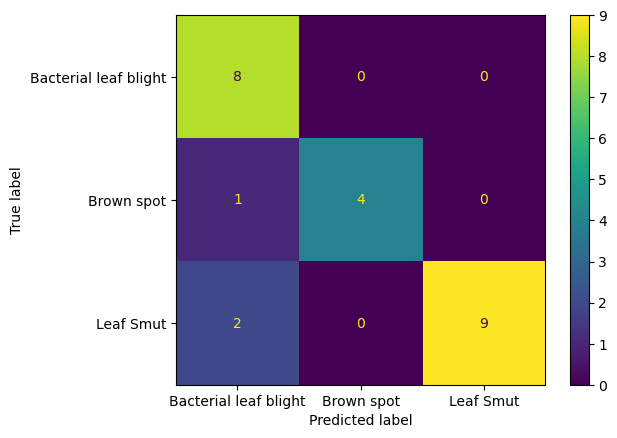

In [52]:
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bacterial leaf blight", "Brown spot", "Leaf Smut"])
print(cm)
cm_plot.plot()

In [85]:
f1 = f1_score(y_test, y_pred, average=None)

In [86]:
l = len(cm)
labels=["Bacterial leaf blight", "Brown spot", "Leaf Smut"]

In [119]:
for i in range(l):
    row = cm[i]
    column = [row[i] for row in cm]
    diagonal = cm[i][i]
    
    precision = diagonal/sum(row)
    recall = diagonal/sum(column)
    print("For ", labels[i])
    print("Precision = ", precision)
    print("Recall = ", recall)
    print("F1 score = ", f1[i])
    print("\n")


For  Bacterial leaf blight
Precision =  1.0
Recall =  0.7272727272727273
F1 score =  0.8421052631578948


For  Brown spot
Precision =  0.8
Recall =  1.0
F1 score =  0.888888888888889


For  Leaf Smut
Precision =  0.8181818181818182
Recall =  1.0
F1 score =  0.9




In [90]:
accuracy = model.evaluate(test)
print("Overall accuracy = ", accuracy[1])

1/1 [==============================] - 14s 14s/step - loss: 0.3589 - accuracy: 0.8750
Overall accuracy =  0.875


In [112]:
class_wise_probabilities = []
for i in range(l):
    temp = []
    for j in y_pred:
        if (j==i):
            temp.append(1)
        else:
            temp.append(0)
    
    class_wise_probabilities.append(temp)

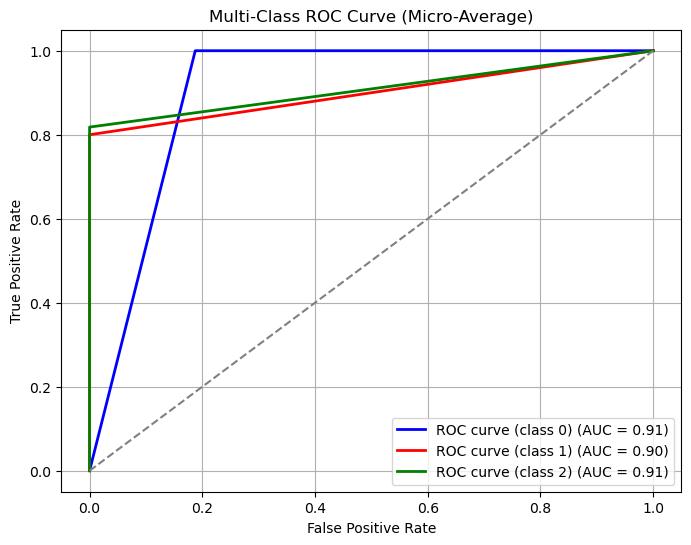

In [118]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

test_labels_bin = label_binarize(y_test, classes=range(l))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(l):
    fpr[i], tpr[i], thresholds = roc_curve(test_labels_bin[:, i], class_wise_probabilities[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']

for i, color in zip(range(l), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label = f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (Micro-Average)')
plt.legend(loc='lower right')
plt.grid()
plt.show()